# Media Analyst Home Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this assignment, I will be using data taken from the PPC channel dated to 18-24 October. 
A quick look at the data:

In [2]:
data = pd.read_excel("Media Analyst- Home Assignment data 1.22.xlsx")
data.head()

,Device,Search term,Campaign,Impr.,Clicks,Cost,Conversions,Revenue
0,Computers,purses louis vuitton,Bags - Brand,1,1,0.45,0,0.00
1,Computers,louis vuitton bags macys,Bags - Brand,1,1,0.47,2,0.50
2,Computers,ball canning supplies company,ball mason jar,1,1,0.44,0,0.00
3,Computers,mazon jars,ball mason jar,1,1,0.34,1,0.29
4,Computers,ball canning jars,ball mason jar,5,1,0.43,0,0.00


First I will add several colunms-
ROI (Return on investment) > revenue - cost
CPC (Cost Per Click) > cost / clicks
CR (Conversion Rates) > Conversions / Imrp.

In [3]:
data["ROI"] = data["Revenue"] - data["Cost"]
data["CPC"] = data["Cost"] / data["Clicks"]
data["CR"] = data["Conversions"] / data["Impr."]

Review of the current data:

In [4]:
data.head()

,Device,Search term,Campaign,Impr.,Clicks,Cost,Conversions,Revenue,ROI,CPC,CR
0,Computers,purses louis vuitton,Bags - Brand,1,1,0.45,0,0.00,-0.45,0.45,0.0
1,Computers,louis vuitton bags macys,Bags - Brand,1,1,0.47,2,0.50,0.03,0.47,2.0
2,Computers,ball canning supplies company,ball mason jar,1,1,0.44,0,0.00,-0.44,0.44,0.0
3,Computers,mazon jars,ball mason jar,1,1,0.34,1,0.29,-0.05,0.34,1.0
4,Computers,ball canning jars,ball mason jar,5,1,0.43,0,0.00,-0.43,0.43,0.0


## 1. Which Campaign Gives The Highest Benefit?

In every part in this section, I will present the top and bottom 10 campaigns that answer the relevant question. 
For better visualization, I will use bar graph built from a general function:

In [5]:
def bar_graph(x, y, title, x_label, y_label):
    plt.figure(figsize = (12, 7))
    plt.bar(x, y)
    plt.title(title, size = 20)
    plt.xlabel(x_label, size = 14)
    plt.xticks(rotation = 90)
    plt.ylabel(y_label, size = 14)
    plt.show()

Now I will examain the ROI's top and bottom 10 campains:

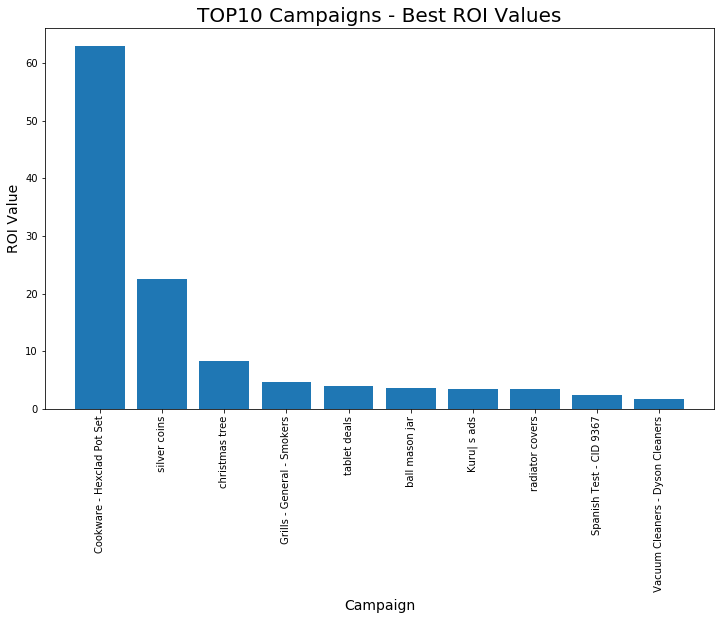

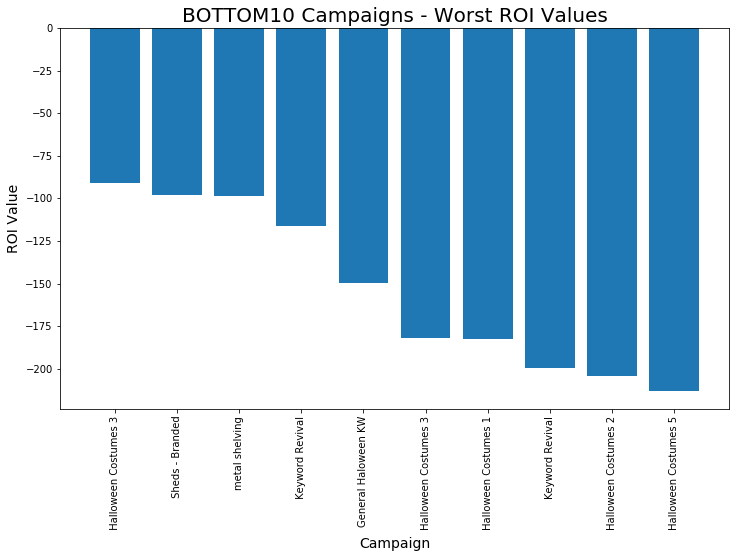

In [6]:
ROI10 = data.groupby("Campaign").ROI.sum().sort_values(ascending = False).reset_index()

bar_graph(ROI10.Campaign.head(10), ROI10.ROI.head(10), "TOP10 Campaigns - Best ROI Values", "Campaign", "ROI Value")
bar_graph(ROI10.Campaign.tail(10), ROI10.ROI.tail(10), "BOTTOM10 Campaigns - Worst ROI Values", "Campaign", "ROI Value")

Now I will look for the 10 Campaigns with most (and least) searches (by search terms):

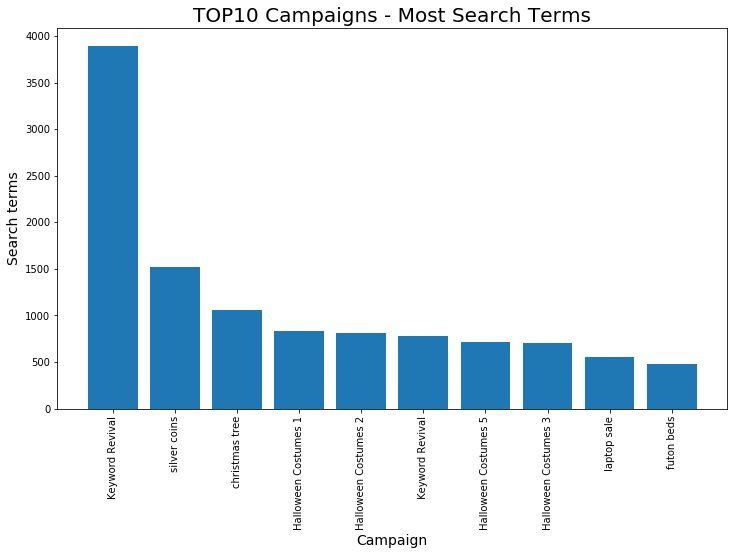

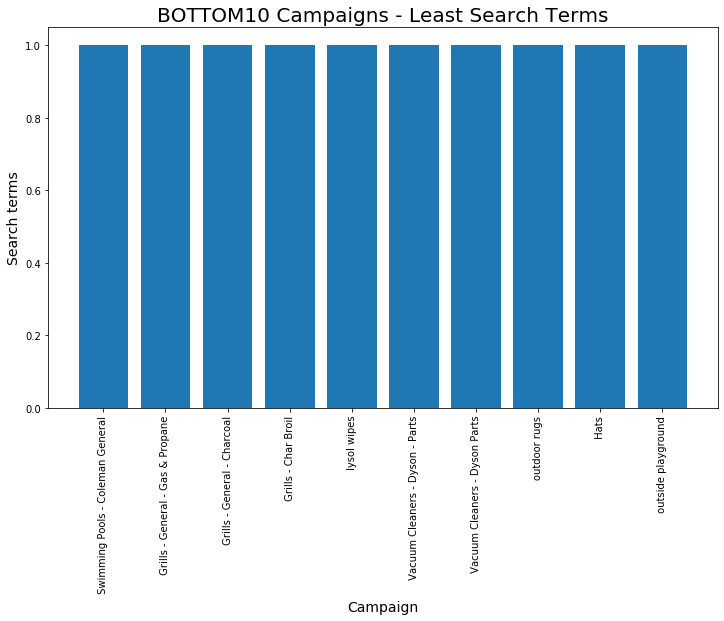

In [7]:
term10 = data.groupby("Campaign")["Search term"].count().sort_values(ascending = False).reset_index()

bar_graph(term10.Campaign.head(10), term10["Search term"].head(10), "TOP10 Campaigns - Most Search Terms",
          "Campaign", "Search terms")
bar_graph(term10.Campaign.tail(10), term10["Search term"].tail(10), "BOTTOM10 Campaigns - Least Search Terms",
          "Campaign", "Search terms")

As seen above, "keyword Revival" campaign has most searches by far from other campaigns. Yet this campaign has one of the lowest ROI value. I will dig in to this campaign later on for further conclusions on how to improve it.
alongside - "silver coins" and "christmas tree" campaigns have high ROI value and high number of search terms.

Now I will show the campaigns with the highest rate of CR

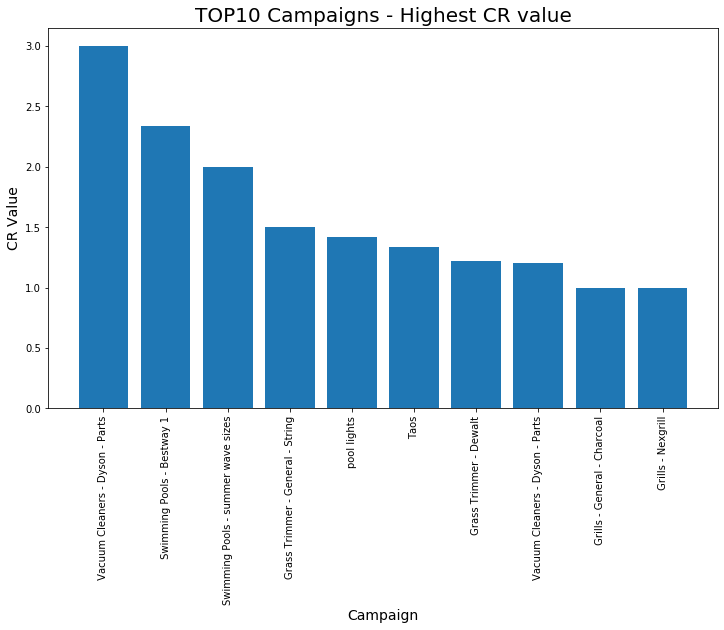

In [11]:
CON = data.groupby("Campaign").Conversions.sum().reset_index()
IMPR = data.groupby("Campaign")["Impr."].sum().reset_index()
CR10 = CON.merge(IMPR, how = "right", on = "Campaign")
CR10["CR"] = CR10["Conversions"] / CR10["Impr."]
CR10 = CR10.sort_values(by = "CR", ascending = False)

bar_graph(CR10.Campaign.head(10), CR10["CR"].head(10), "TOP10 Campaigns - Highest CR value", "Campaign", "CR Value")

As seen above, although "vacuum cleaners - Dyson - parts" campaign has the highest rate of CR, it also have one of the lowest search term count - this campaign is another one to look at.

Now let's see which campaign cost the most (high rate of CPC and high amount of clicks):

<Figure size 864x504 with 0 Axes>

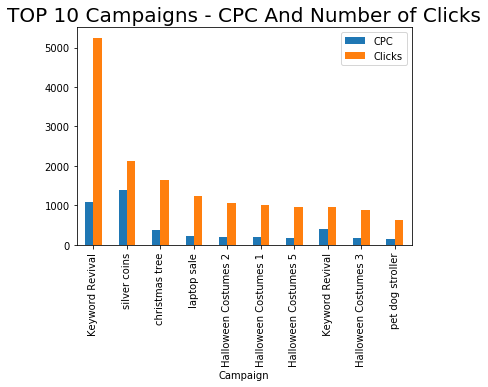

<Figure size 864x504 with 0 Axes>

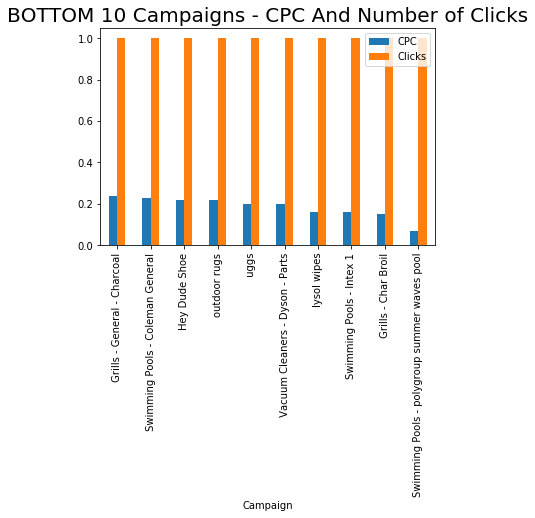

In [12]:
CPC = data.groupby("Campaign").CPC.sum().sort_values(ascending = False).reset_index()
Clicks = data.groupby("Campaign").Clicks.sum().sort_values(ascending = False).reset_index()
CPC = CPC.merge(Clicks, how = "right", on = "Campaign")
CPC10 = CPC.sort_values(by = ["Clicks", "CPC"] , ascending = [False, False]).set_index("Campaign")

plt.figure(figsize = (12, 7))
CPC10.head(10).plot.bar()
plt.title("TOP 10 Campaigns - CPC And Number of Clicks", size = 20)
plt.show()

plt.figure(figsize = (12, 7))
CPC10.tail(10).plot.bar()
plt.title("BOTTOM 10 Campaigns - CPC And Number of Clicks", size = 20)
plt.show()

As shown above, "keyword revival" campaign and "silver coins" are still leading in number of clicks and the price per click.
Also, "vacuum cleaners - parts" which was leading in CR rate, now is in the lower part of CPC and clicks.

Now I will look for the campaigns with the most and least purchases (Conversions):

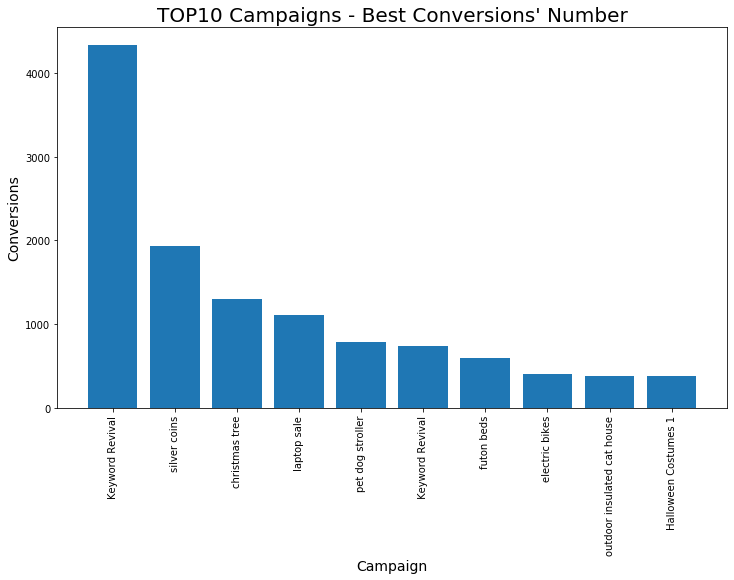

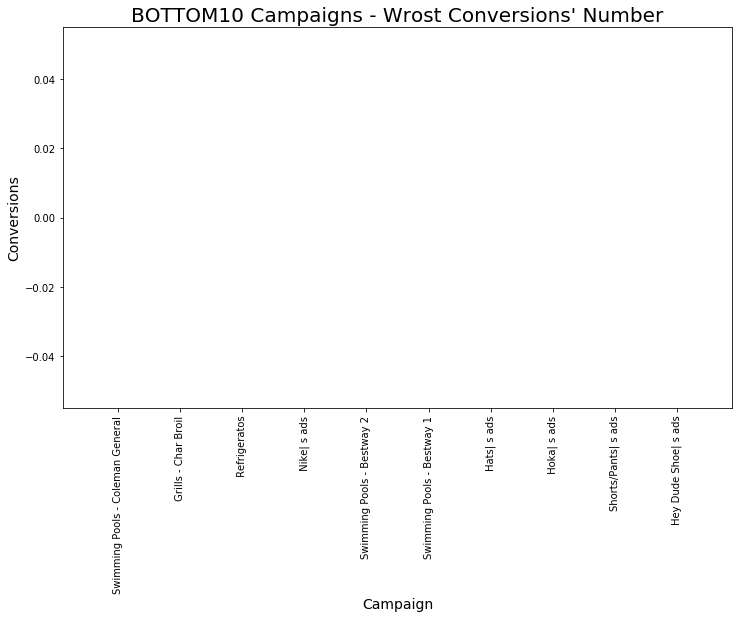

In [13]:
CON = data.groupby("Campaign").Conversions.sum().sort_values(ascending = False).reset_index()

bar_graph(CON.Campaign.head(10), CON.Conversions.head(10), "TOP10 Campaigns - Best Conversions' Number",
          "Campaign", "Conversions")
bar_graph(CON.Campaign.tail(10), CON.Conversions.tail(10), "BOTTOM10 Campaigns - Wrost Conversions' Number",
          "Campaign", "Conversions")

In this part, we can see "keyword revival", "silver coins" and "cristmas tree" campaigns on top again.

Now I will examain which device is being used to click each campaign:

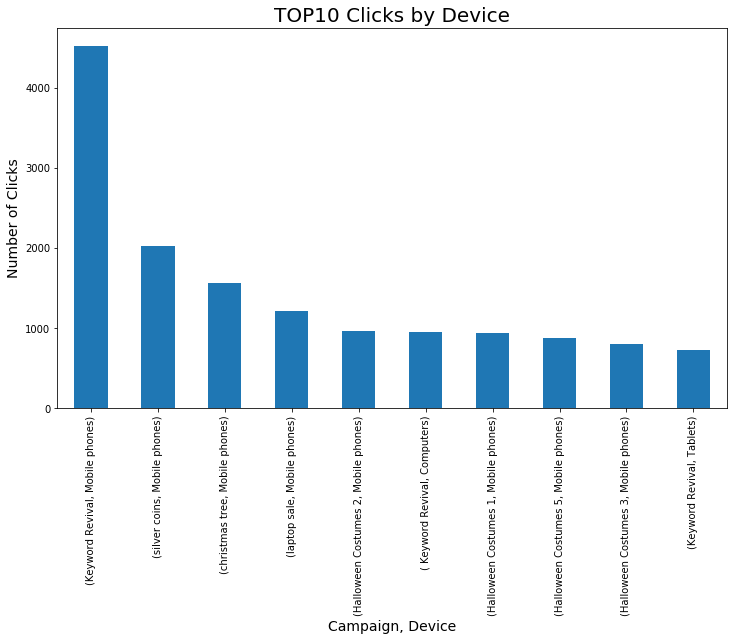

In [14]:
devTOP10 = data.groupby(["Campaign", "Device"]).Clicks.sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12, 7))
devTOP10.plot.bar()
plt.title("TOP10 Clicks by Device", size = 20)
plt.xlabel("Campaign, Device", size = 14)
plt.xticks(rotation = 90)
plt.ylabel("Number of Clicks", size = 14)
plt.show()

As shown, "keyword revival" campaign is leading in number of clicks using mobile. This statement is also true for "silver coins" and "christmas tree" campaigns.

For a quick idea about buyers' preferences, I build a pie chart to show which device id being used the most:

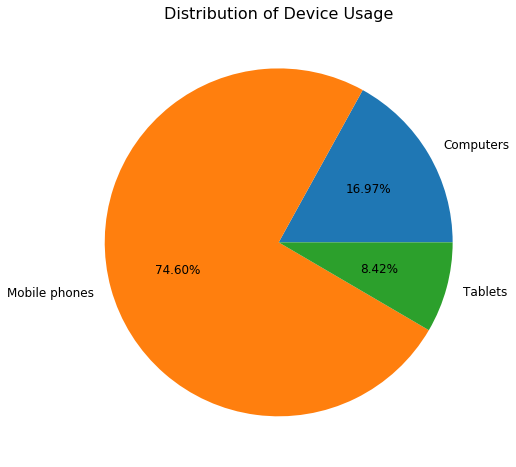

In [15]:
dev = data.groupby("Device")["Search term"].count().reset_index()
plt.figure(figsize=(10, 8))
plt.pie(dev["Search term"], labels = dev["Device"], textprops = {"fontsize": 12}, autopct="%1.2f%%")
plt.title("Distribution of Device Usage", size = 16)
plt.show()

## 2. Dig In - Looking Up Close To Most And Least Successful Campaigns

After I roughly concluded from the graphs above, now I will look closer to several campaigns for better understanding and recomendations.
I will start with building a basic function which returns the summary of the all campaign's information:

In [16]:
def info(campaign_name):
    return data.loc[data.Campaign == campaign_name].groupby("Device").agg({"Search term": "count", "Impr.": "sum",
                                                                   "Clicks": "sum", "Cost": "sum", "Conversions": "sum",
                                                                   "Revenue": "sum"})

Now I will use this function to drow the information on the following campaigns: Keyword Revival, silver coins, christmas tree, vacuum cleaners - Dyson - parts

In [17]:
info("Keyword Revival")

,Search term,Impr.,Clicks,Cost,Conversions,Revenue
Device,,,,,,
Mobile phones,3247,119210,4519,1485.77,3723,1328.28
Tablets,642,2252,733,206.00,609,163.93


In [18]:
info("silver coins")

,Search term,Impr.,Clicks,Cost,Conversions,Revenue
Device,,,,,,
Mobile phones,1425,20754,2027,1918.25,1836,1869.40
Tablets,97,450,105,89.77,102,64.91


In [19]:
info("christmas tree")

,Search term,Impr.,Clicks,Cost,Conversions,Revenue
Device,,,,,,
Mobile phones,996,16204,1568,568.80,1229,574.5
Tablets,62,309,71,21.49,66,24.1


In [20]:
info("Vacuum Cleaners - Dyson - Parts")

,Search term,Impr.,Clicks,Cost,Conversions,Revenue
Device,,,,,,
Mobile phones,3,3,3,0.50,3,0.44
Tablets,2,2,3,0.45,3,0.48


In [21]:
info("Cookware - Hexclad Pot Set")

,Search term,Impr.,Clicks,Cost,Conversions,Revenue
Device,,,,,,
Mobile phones,98,1582,146,69.58,103,136.4
Tablets,11,22,12,5.76,13,1.9


## 3. Conclusions

First of all, I could certainty say that majority of traffic originated from mobiles (74.6%). So my first recomendation will be to make sure that all the campaigns (and especially the most important / beneficial ones) will have mobile support.
Secondly, although the "Keyword Revival" campaign appears to be successful with high rates of exposure and purchases, yet the total profit (ROI) is too low for this kind of campaign and my recomendation is either raise the price or lower the CPC (especially when this campaign gives so many clicks).
For the "silver coins" campaign - it has very high rates regarding exposure and purchases and even positive value of ROI. Same goes to the "christmas tree" campain which also has very good values. I would put my attention to this campaign since it has a very limited "hot season", and try to improve the number of purchases by making sure that it will appear in every relevant word combination and on multiple websites.
The campaign with the highest ROI value is "Cookware - Hexclad Pot Set" which as seen above relates to the low CPC rate. It also has low click rates and search terms per purchases so I would look for a better way to present the product on ads and to drow people to click the ad.
Although the "Vacuum Cleaners - Dyson - Parts" campaign appaered to have a high CR value, yet it looks like it is because there were few entrances to the ad. Most likley the buyers searched this particular product since the number of search terms, views, clicks and purchases are all the same.
I would put my special attention to the following campaigns since they appeared to be on the bottom charts for most of the features - Halloween costumes, grills, and swimming pools, starting with halloween costumes since this campaign has a specific "hot season" which is about to end in the next several days (halloween is dated to Oct 31).